當前工作目錄 ==> /home/jovyan/SSNP3D/2_dir
Left Down point: 0 , 0
Right Up point:  4000 , 7800
height (min, max) 0.0 357.21




Done


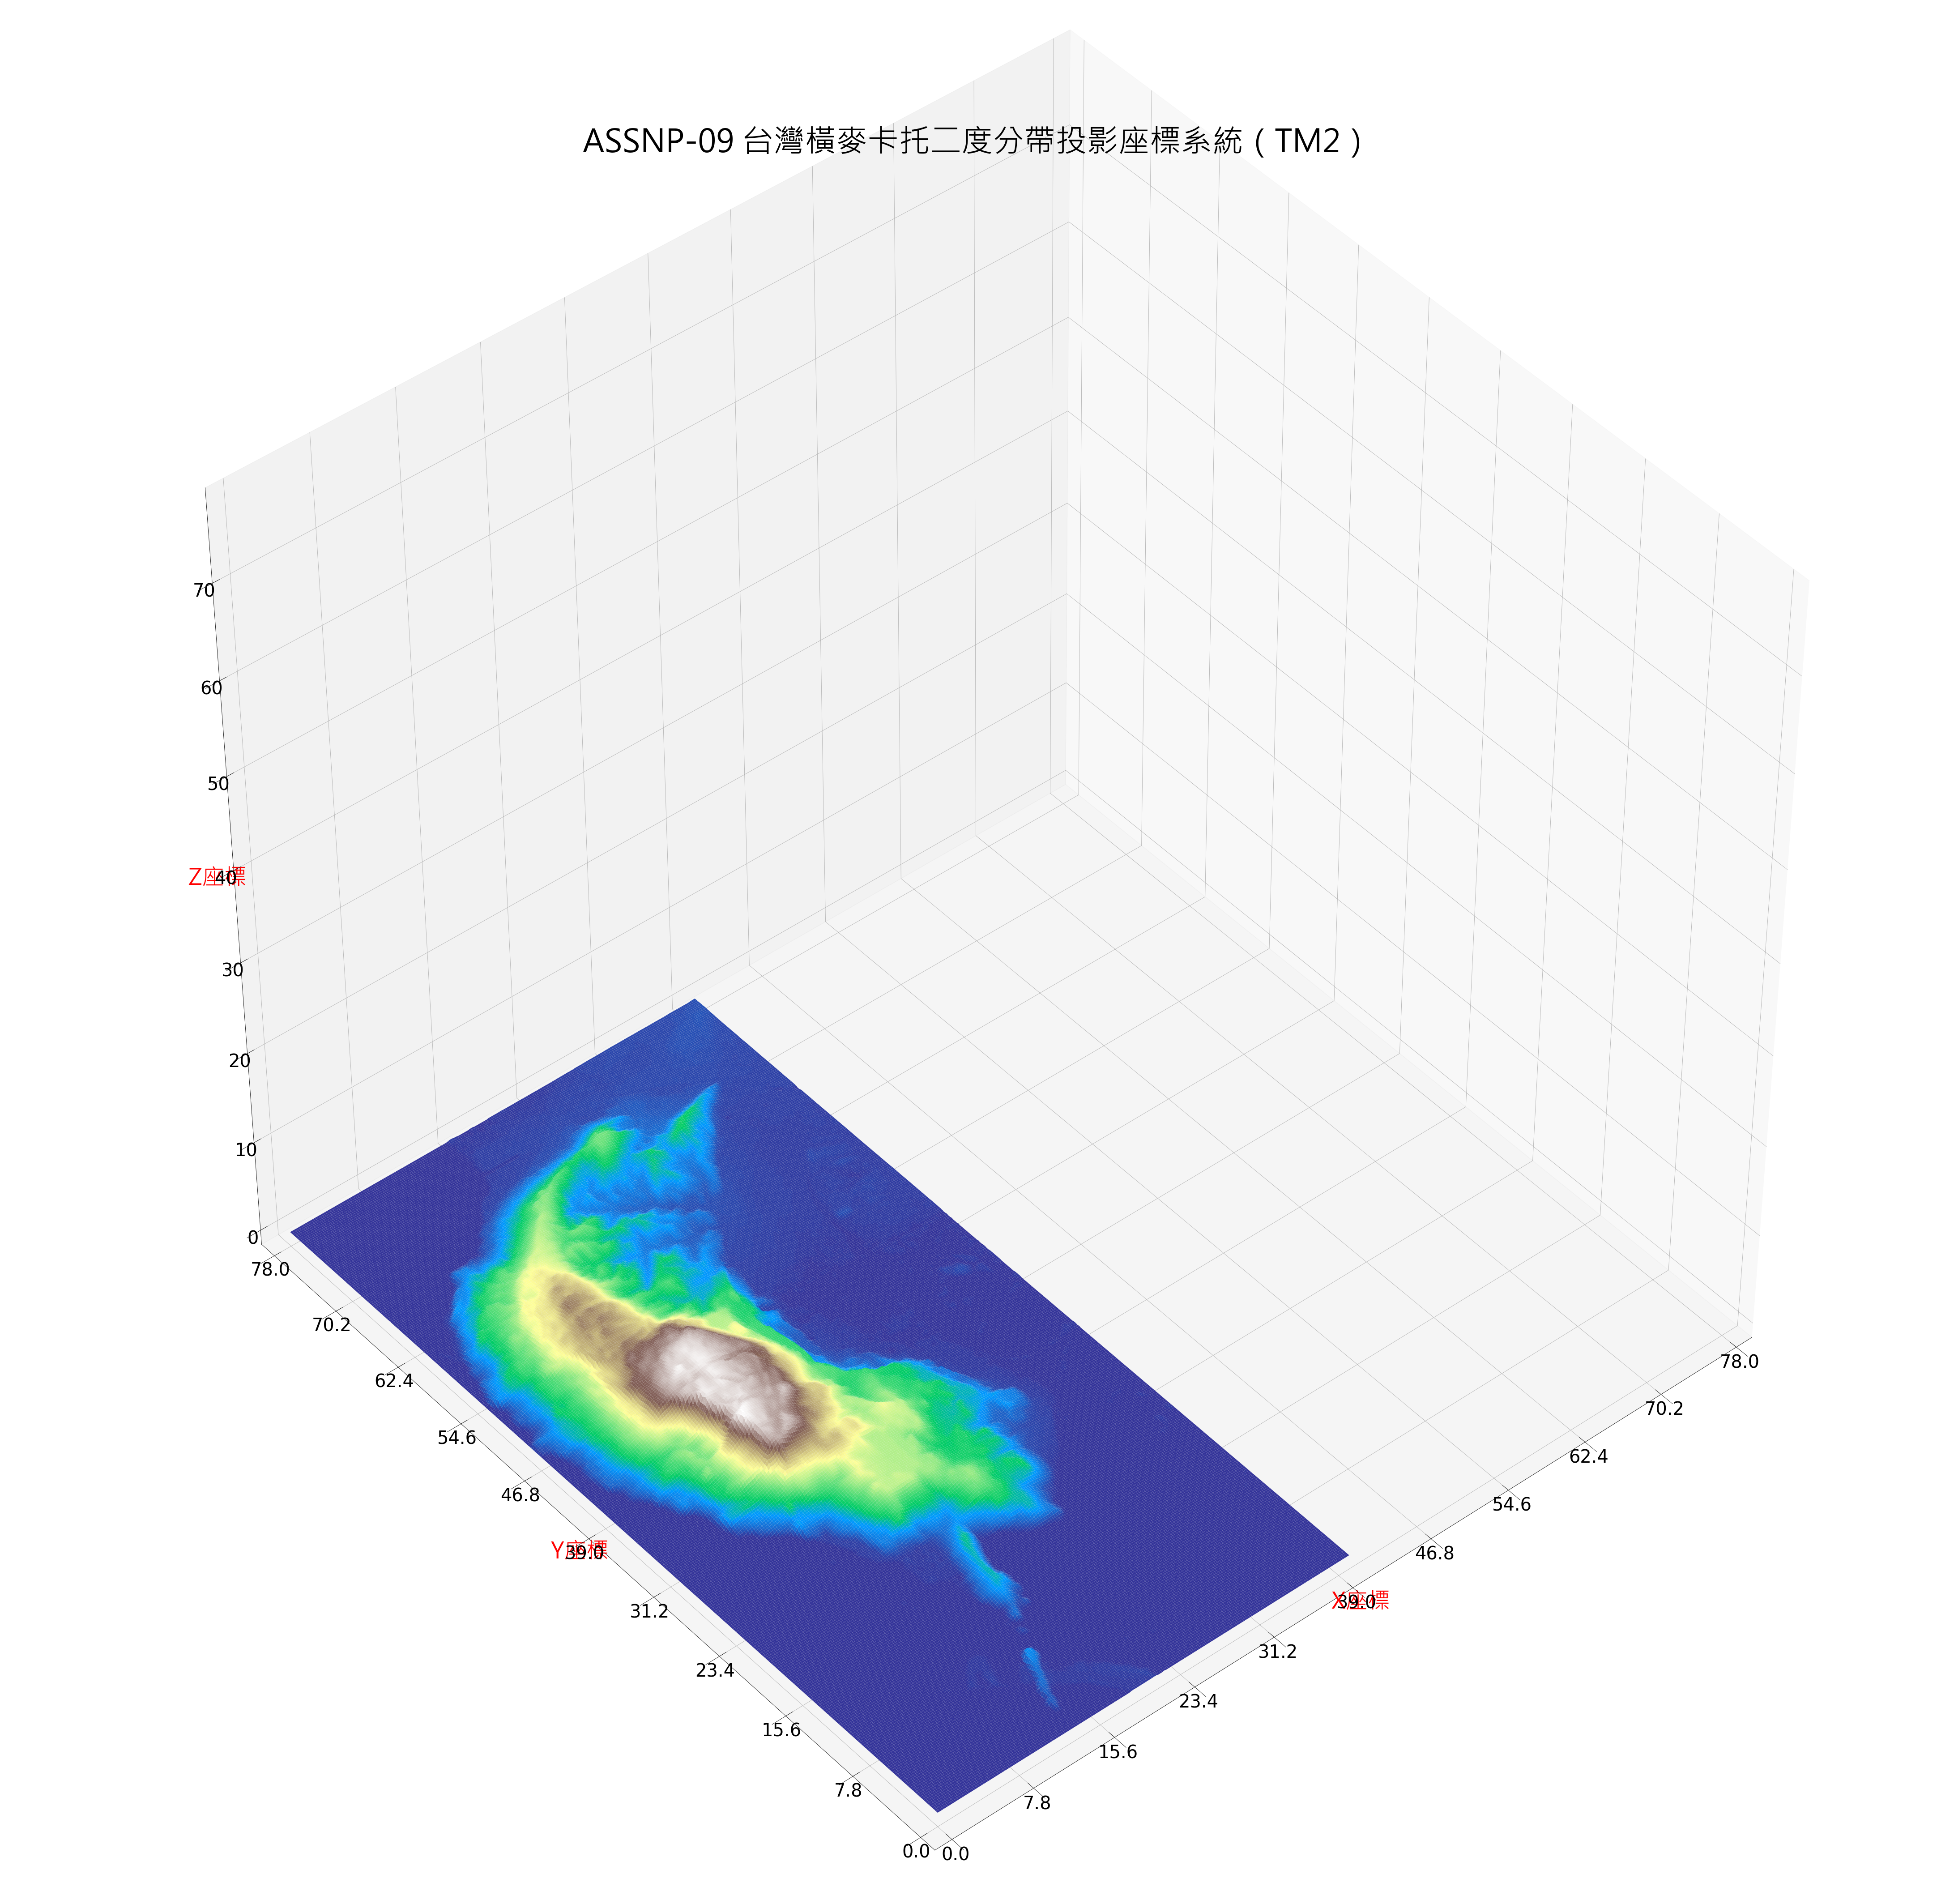

In [1]:
# ASSNP-09.py
# 2018-11-16
#
# Matplotlib 不支持直接輸出内嵌3D對象的PDF文件
#
# read dem-all-7.csv file
# transposed array, work for space delimeter
# x,y,z = np.loadtxt(path_data + 'dem_all-7.csv', unpack=True)
#
# run on myBinder.org JupyterLab
# 程式檔 path is '/home/jovyan/SSNP3D/2_dir'
# 資料檔 path is '/home/jovyan/SSNP3D/2_dir/data'
# 圖形檔 path is '/home/jovyan/SSNP3D/2_dir/graphic'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from matplotlib import cm # colormap
from mpl_toolkits.mplot3d import Axes3D
#
path_data    = './data/'
path_graphic = './graphic/'
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# ----------------------------------------------------------------------------------------------------
#
# Left Down point: 0, 0
# Right Up point:  4000, 7800
# height (min, max) 0, 535.81
#
# 3D graphic x,y factor = 0.01
# 3D graphic z   factor = 0.01 * 1.5
#
"""
# 建立一個繪圖物件
# 用這個繪圖物件建立一個Axes物件(有3D座標)
# 消除Shell運行時顯示的警告 MatplotlibDeprecationWarning？
fig = plt.figure(figsize=(78, 78)) 
ax = Axes3D(fig)
fig.add_axes(ax)
# 
"""
fig = plt.figure(figsize=(78, 78))
ax  = fig.add_subplot(1,1,1, projection='3d')
#
plt.xlim(0, 78)    # xlim, ylim, zlim need to be same
plt.ylim(0, 78)    
ax.set_zlim(0, 78)
#
x_ticks = np.linspace(0,78,11)
y_ticks = np.linspace(0,78,11)
z_ticks = np.linspace(0,78,11)
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=40)
#
plt.xlabel   ('X座標', fontproperties=myfont, fontsize=50)
plt.ylabel   ('Y座標', fontproperties=myfont, fontsize=50)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=50)
#
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
#
# 此程式碼使輸出之3D圖像Z軸比例更正確
plt.gca().set_aspect('auto', adjustable='box') # set X,Y same ratio & scale
#
# 設定子圖的標題
ax.set_title('ASSNP-09 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=70)
#
# --------------------------------------------------------------------------
#
# 逐筆讀入資料 dem-all-7.csv
# Read from the file into the array data(:,:)
# array data shape is (...., 3)
#
# Columns.
# data[..., 0] is array of float number, 二度分帶 X座標
# data[..., 1] is array of float number, 二度分帶 Y座標
# data[..., 2] is array of float number, DEM file z value
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
float_To_int = np.vectorize(np.int32)
#
data = np.loadtxt(path_data + 'dem-all-7.csv',delimiter=',',dtype='float')
#
min_item = np.amin(data, axis=0) # axis=0 --> min of each column
max_item = np.amax(data, axis=0) # axis=0 --> max of each column
#
print ('Left Down point:', float_To_int(min_item[0]), ',', float_To_int(min_item[1]))
print ('Right Up point: ', float_To_int(max_item[0]), ',', float_To_int(max_item[1]))
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
TM2_X = float_To_int(data[..., 0]) # 二度分帶 X座標
TM2_Y = float_To_int(data[..., 1]) # 二度分帶 Y座標
TM2_Z = data[..., 2]               # DEM file z value, float type
#
# XYlist is sorted (x, y), first order is y, then x
XYlist = list(zip(TM2_X,TM2_Y))
#
# Left Down point: 0, 0
# Right Up point:  4000, 7800
# height (min, max) 0, 535.81
#
# 3D graphic x,y factor = 0.01
# 3D graphic z   factor = 0.01 * 1.5
#
# X, Y value
X = np.arange(0, 4020, 20)
Y = np.arange(0, 7820, 20)
Xmesh, Ymesh = np.meshgrid(X, Y)  # x-y 平面的網格
#
# pprint.pprint(Xmesh[-1])
# print ('\n')
# pprint.pprint(Ymesh[-1])
# print ('\n')
#
# 7800/20 ==> 391
# 4020/20 ==> 201
Zmesh = np.zeros(shape=(391,201),dtype=np.float16)
i = 0
j = 0
#
for y in np.arange(0, 7820, 20) :
    z = np.zeros(shape=(201),dtype=np.float16)
    zi = 0
    for x in np.arange(0, 4020, 20):
        if (x,y) in XYlist :
            # print(str(zi), list([x,y]), TM2_Z[i])
            z[zi] = TM2_Z[i]
            i = i + 1
        else :
            # print(str(zi))
            z[zi] = 0.0
        # end if
        zi = zi + 1
    #end for
    # pprint.pprint(z)
    Zmesh[j] = z
    j = j + 1
#end for
#
print ('\n')
# pprint.pprint(Zmesh[-1])
#
factor_3D = 0.01
Xmesh_3D = factor_3D * Xmesh
Ymesh_3D = factor_3D * Ymesh
Zmesh_3D = factor_3D * Zmesh * 1.5
#
# cstride	Array column stride (step size)
# rstride	Array row stride    (step size)
#
ax.plot_surface(Xmesh_3D, Ymesh_3D, Zmesh_3D, cstride=1, rstride=1, cmap=plt.cm.terrain)
ax.view_init(elev=45, azim=230) # view_init(elev,azim) # 兩個参數
plt.draw()
#
# bbox_inches='tight' is for display ylabel
# on myBinder.org jupyterLab platform, set dpi=300 will make kernel die
#
plt.savefig(path_graphic + "ASSNP-09.png", format='png', dpi=150, bbox_inches='tight')
# plt.savefig(path_graphic + "ASSNP-09.pdf", dpi=300, bbox_inches='tight')
#
# run time need 8m:30s
print ('Done')